In [37]:
import re, string,os
from glob import glob as gb
import pandas as pd
from collections import Counter
from tqdm import tqdm
import seaborn as sns
import subprocess
from utils.functions import *
import seaborn as sns 
import matplotlib.pyplot as plt
import spacy 
import matplotlib.patheffects as path_effects
nlp = spacy.load("en_core_web_sm")

stops = stopwords.words('english') + ["hon","member","right","friend","mr",'hon.','make','say','great']


plotting.style(12)

In [2]:
df = pd.read_csv('~/Documents/GitHub/CrisisBureaucracy/data/bureaucracy-sentences-full.tsv',sep='\t')
df['window'] = utils.preprocess_(df['window'])
df['window'] = [" ".join([w.text for w in nlp(t) if w.pos_ in ["ADJ","NOUN"] and w.text not in stops]) for t in tqdm(df['window'])]

100%|██████████| 4080/4080 [01:26<00:00, 47.08it/s]


In [8]:
def ttr(text):
    tokens = len(text.split(' '))
    types = len(set(text.split(' ')))

    nttr = (types / tokens) / tokens
    return nttr

In [31]:
d = []
for y in range(1957,1985):
    tdf = df[df['id'].str.split('-').str[1].astype(int) == y]
    
    for p in ["labour","conservative"]:
        tdff = tdf[tdf.id.str.split('-').str[-1] == p]
        tdffs = [ttr(t) for t in tdff['window']]
        d.append([y,sum(tdffs) / len(tdffs),p])
    # for t in tdf:
    #     d.append([y,t])
d = pd.DataFrame(d,columns=['year','ttr','party'])
d = d.pivot(index='year',columns='party',values='ttr').reset_index()

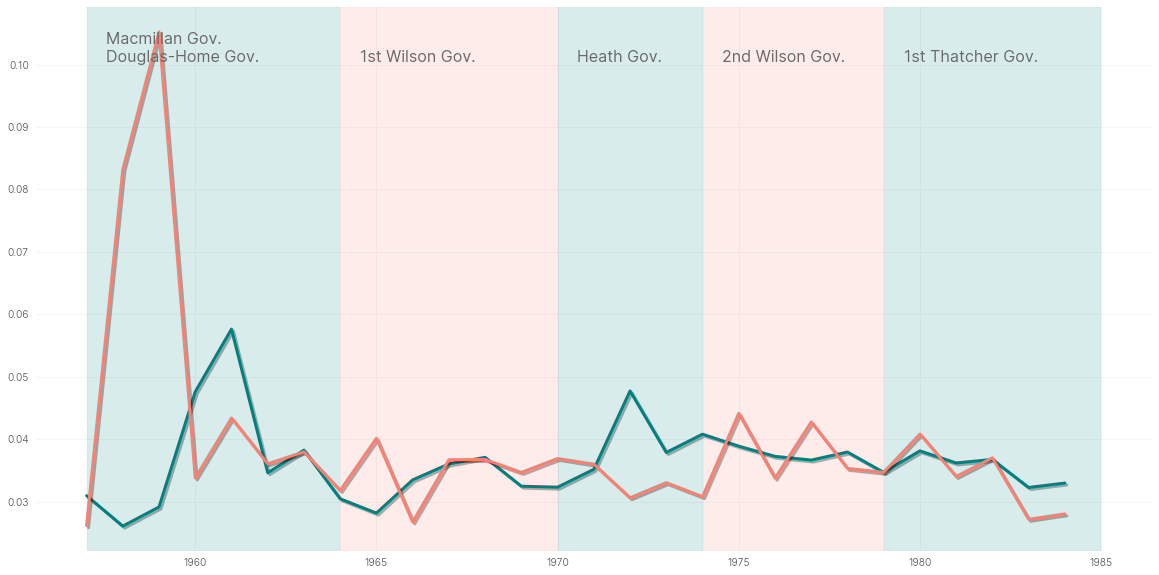

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(d['year'], d['conservative'],color='teal',linewidth=3,path_effects=[path_effects.SimpleLineShadow(),path_effects.Normal()])
plt.plot(d['year'], d['labour'],color='salmon',linewidth=3,path_effects=[path_effects.SimpleLineShadow(),path_effects.Normal()])

for x in [['Macmillan Gov. \nDouglas-Home Gov.',1957,1964,"teal"],["1st Wilson Gov.",1964,1970,"salmon"],["Heath Gov.",1970,1974,"teal"],["2nd Wilson Gov.",1974,1979,"salmon"],["1st Thatcher Gov.",1979,1985,"teal"]]:
    ax.axvspan(x[1], x[2], alpha=0.15, color=x[3])
    ax.text(x[1] + (abs(ax.get_xlim()[0]-ax.get_xlim()[1]) / 55),ax.get_ylim()[1] - (abs(ax.get_ylim()[0]-ax.get_ylim()[1]) / 10), x[0], fontsize=16)


In [64]:


for c,i in enumerate(range(1957,1985)):
    dfc = df
    dfc['cat'] = ["year" if int(x.split('-')[1]) in list(range(i,i+1)) else "other" for ci,x in enumerate(dfc['id'])]
    tfidfo, docterms = tfidf.get_docterms(dfc,"window")
    tt = tfidf.get_topterms(tfidfo,docterms,dfc,'cat')
    print(i,", ".join(tt['year'][:10]))

1957 country, good, question, parliamentary, clause, way, ministry, matter, general, house
1958 good, power, house, life, state, local, gentleman, matter, democracy, opposite
1959 policy, matter, responsible, parliament, government, county, present, gentleman, use, house
1960 fact, case, trade, house, course, question, minister, area, export, complexity
1961 minister, case, gentleman, industry, government, department, customs, opposite, house, matter
1962 test, minister, hand, matter, committee, democratic, financial, afraid, criticism, bureaucratic
1963 official, people, council, town, london, present, government, councillor, end, home office
1964 land, land commission, house, commission, word, gentleman, price, government, minister, people
1965 rent, people, extra, opposite, service, view, country, business, london, officer
1966 government, gentleman, minister, price, investment, new, case, clause, board, time
1967 government, minister, people, ministry, gentleman, year, industry, ca

'16713-1957-02-08.5.1.26.11-conservative'